<a href="https://colab.research.google.com/github/pythoner-code/Computer-vision-programs/blob/main/Exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: Random Forest
Accuracy: 0.9778
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      0.94      0.97        17
           4       0.96      1.00      0.98        25
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        19
           7       0.95      0.95      0.95        19
           8       1.00      1.00      1.00         8
           9       0.96      0.96      0.96        25

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

Model: Support Vector Machine
Accuracy: 0.9778
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

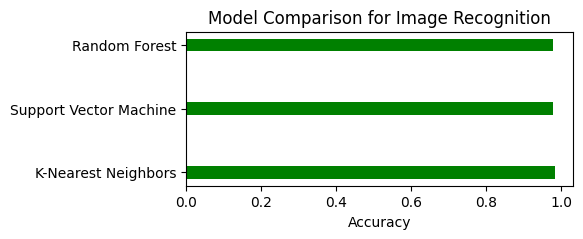

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
# Load a sample image dataset (digits dataset in this example)
data = load_digits()
X = data.images
y = data.target
# Flatten the images to use as feature vectors
X = X.reshape((X.shape[0], -1))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Define a dictionary of classification models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', C=1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep
    }
# Compare and display the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:\n", result["classification_report"])
    print("=" * 50)
# Plot a bar chart to visualize model performance
bar_width=0.2
model_names = list(results.keys())
accuracies = [result['accuracy'] for result in results.values()]
plt.figure(figsize=(5, 2))
plt.barh(model_names, accuracies, color='green', height=bar_width)
plt.xlabel('Accuracy')
plt.title('Model Comparison for Image Recognition')
plt.gca().invert_yaxis()
plt.show()